In [ ]:
# Nhập các thư viện cần thiết

# Cú pháp chung để nhập các hàm cụ thể trong thư viện:
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# Cú pháp chung để nhập thư viện nhưng không có chức năng:
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Bật tính năng vẽ nội tuyến
%matplotlib inline

In [ ]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas version 1.1.4
Matplotlib version 3.2.2


Dữ liệu sẽ bao gồm 5 tên em bé và số lần sinh được ghi lại trong năm 1880

In [ ]:
# Tập hợp ban đầu từ em bé và tỉ lệ sinh
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

Sử dụng  hàm zip để hợp 2 danh sách với nhau

In [ ]:
zip?

In [ ]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

Sử dụng thư viện pandas để xuất từ dữ liệu này thành tệp .csv

df sẽ là 1 đối tượng DataFram .
Xem nội dung bên trong df bên dưới.

In [ ]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Xuất khung dữ liệu sang tệp csv. Có thể đặt tên là sinh1880.csv

Hàm to_csv sẽ được sử dụng để xuất tệp.

Tệp sẽ được lưu ở cùng 1 vị trí của cửa sổ ghi chép trừ khi có chỉ định khác.

In [ ]:
df.to_csv?

Các tham số duy nhất có thể sử dụng là index và header.
Đặt các tham số này thành False sẽ ngăn không cho xuất tên index và header. Thay đổi giá trị của các tham số này để hiểu rõ hơn về việc sử dụng chúng.

Để kéo tệp csv vào, ta sử dụng hàm pandas read_csv.
Xem xét chức năng này và những gì đầu vào của nó có.

In [ ]:
df.to_csv('births1880.csv',index=False,header=False)

In [ ]:
read_csv?

Mặc dù các hàm này có nhiều tham số, ta chỉ đơn giản là chuyển nó vào vị trí của tệp văn bản.

Location=/content/births1880.csv

In [ ]:
Location = r'/content/births1880.csv'
df = pd.read_csv(Location)

Chú ý lí tự "r" trước chuỗi. Khi các dấu gạch chéo là các lý tự đặc biệt, tiền tố của chuỗi bằng một r sẽ thoát khỏi toàn bộ chuỗi.

In [ ]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [ ]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [ ]:
df = pd.read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973



Bạn có thể coi các số [0,1,2,3,4] là số hàng trong tệp Excel. Ở pandas, chúng là một phần của index của khung dữ liệu. Bạn có thể coi index là khóa chính của bảng sql với ngoại lệ là index được phép có các bản sao.

Dữ liệu chúng tôi có bao gồm tên em bé và số lần sinh vào năm 1880. Chúng tôi đã biết rằng chúng tôi có 5 bản ghi và không bản ghi nào bị thiếu (giá trị không rỗng).

Cột Names tại thời điểm này không có gì đáng lo ngại vì rất có thể nó chỉ bao gồm các chuỗi số chữ cái (tên con). Có thể có dữ liệu xấu trong cột này nhưng chúng tôi sẽ không lo lắng về điều đó tại thời điểm phân tích này. Cột Births chỉ nên chứa các số nguyên đại diện cho số trẻ sinh ra trong một năm cụ thể với một tên cụ thể. Chúng ta có thể kiểm tra xem tất cả dữ liệu có thuộc kiểu dữ liệu số nguyên hay không. Sẽ không hợp lý nếu cột này có kiểu dữ liệu là float. Tôi sẽ không lo lắng về bất kỳ ngoại lệ nào có thể xảy ra vào thời điểm này của phân tích.

In [ ]:
import os
os.remove(Location)

In [ ]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [ ]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

Như bạn có thể thấy, cột Births là kiểu int64, do đó sẽ không có dấu nổi (số thập phân) hoặc ký tự số alpha nào trong cột này.

Để tìm tên phổ biến nhất hoặc tên trẻ có tỷ lệ sinh cao nhất, chúng ta có thể thực hiện một trong các thao tác sau.


> Sắp xếp khung dữ liệu và chọn hàng trên cùng


> Sử dụng thuộc tính max () để tìm giá trị lớn nhất





In [ ]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [ ]:
# Method 2:
df['Births'].max()

973

Tại đây chúng ta có thể vẽ biểu đồ cột Births và gắn nhãn biểu đồ để hiển thị cho người dùng cuối điểm cao nhất trên biểu đồ. Kết hợp với bảng, người dùng cuối có một bức tranh rõ ràng rằng Mel là tên em bé phổ biến nhất trong tập dữ liệu.

**Giải thích các phần:**


> df ['Names'] - Đây là toàn bộ danh sách tên con, toàn bộ cột Names

> df ['Births'] - Đây là toàn bộ danh sách Sinh vào năm 1880, toàn bộ cột Births


> df ['Births']. max () - Đây là giá trị lớn nhất được tìm thấy trong cột Births

> [df ['Births'] == df ['Births']. max ()] CẦN CÓ [Tìm tất cả các bản ghi trong cột Births có giá trị bằng 973]
df ['Names'] [df ['Births'] == df ['Births']. max ()] LÀ BẮT BUỘC Chọn tất cả các bản ghi trong cột Tên WHERE [Cột Sinh bằng 973]









Một cách thay thế có thể là sử dụng khung dữ liệu Đã sắp xếp:
Sorted['Names'].Head(1).value

Hàm str() chỉ đơn giản là chuyển đổi một đối tượng thành một chuỗi.

The most popular name


,Names,Births
4,Mel,973


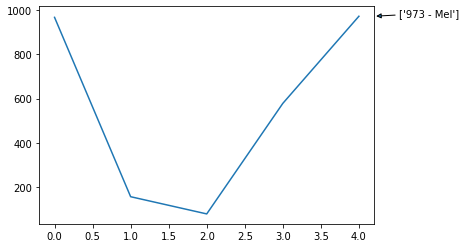

In [ ]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), 
                   xytext=(25, 0), 
                   xycoords=('axes fraction', 'data'), 
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='-|>'))

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used